# Steel Data Team: King County Housing Market Analysis

## Introduction

The Bank of Seattle is going through a major tech transformation and would like to have a predictive model of housing prices in King County. The goal of this notebook is to inform the bank which housing features have the biggest impact on the value of a house.

## Business Understanding

__Stakeholder:__  Bank of Seattle

__Problem:__  Before a bank can agree to handing out a mortgage, they want to make sure that the client is buying a home that has a value equal to or greater than the value of the requested mortgage, due to the unfortunate possibility that the client would not be able to pay all of their mortgage payments, in which case the bank would take the house as collateral.

__Subproblem:__ Houses have numerous features so it is dfficult to narrow down which exact features result in higher priced homes.

__Assumptions:__ 
- The size of a house has a positive linear relationship with price.

- The better the condition of a house is, the more valuable it will be.


## Data Understanding

There is 1 csv file that we are getting our data from.  In this section we will explore the data and learn the size and shape of our dataset.  We will also gain an understanding of the housing features presented in this dataset.

In [11]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats

In [12]:
# read CSV file
df=pd.read_csv('../../data/kc_house_data.csv')

In [13]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Our dataset has 21597 records and 21 columns
- we have 3 columns with missing values

In [15]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='Count'>

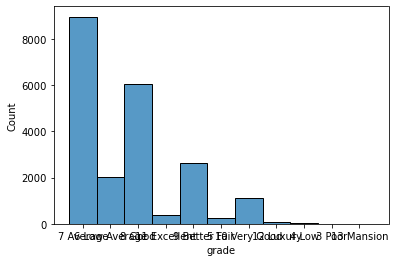

In [17]:
sns.histplot(df['grade'])

In [18]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Note that the mean for 'bedrooms' 3.37 and the max for bedrooms is 33.  This is an easy outlier to spot. 

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

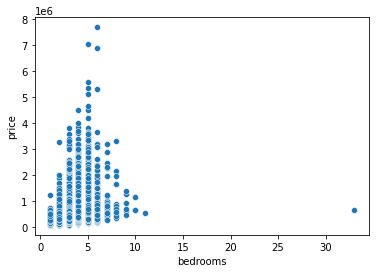

In [19]:
# look for outliers
sns.scatterplot(df['bedrooms'],df['price'])


In [20]:
# look for the specifics of that outlier
df.loc[df['bedrooms'] == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors waterfront  view  ...      grade sqft_above  \
15856      6000     1.0         NO  NONE  ...  7 Average       1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

The house with 33 bedrooms only costs $640,000.  Also this house has 1.75 bathrooms.  This record holds an outlier and the rest of the features do not add up.  We will drop this outlier from our dataset.

In [21]:
# we will drop this outlier by using the record index.
df=df.drop(15856)

Check to see if we dropped the right record.

In [22]:
df.describe()


id         price      bedrooms     bathrooms   sqft_living  \
count  2.159600e+04  2.159600e+04  21596.000000  21596.000000  21596.000000   
mean   4.580575e+09  5.402920e+05      3.371828      2.115843   2080.343165   
std    2.876764e+09  3.673760e+05      0.904114      0.768998    918.122038   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308950e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159600e+04  21596.000000  21596.000000  21596.000000  17754.000000   
mean   1.509983e+04      1.494119   1788.631506   1971.000787     83.641489   
std    4.141355e+04      0.539685    827.763251     29.375460    399.957185   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.619000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068550e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21596.000000  21596.000000  21596.000000   21596.000000   21596.000000  
mean   98077.950685     47.560087   -122.213977    1986.650722   12758.656649  
std       53.514040      0.138552      0.140725     685.231768   27275.018316  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

we can confirm that we dropped the right record because max bedrooms is now 11.

#### Lets check the correlation between one of our features and 'price'

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

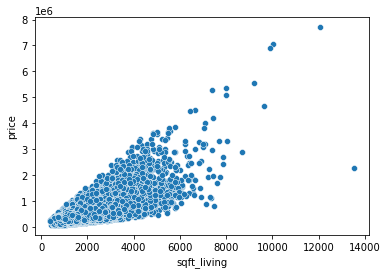

In [23]:
sns.scatterplot(df['sqft_living'],df['price'])

In [24]:
# look for the outlier on the far right
df.loc[df['sqft_living']== 13540].T

12764
id             1225069038
date             5/5/2014
price            2.28e+06
bedrooms                7
bathrooms               8
sqft_living         13540
sqft_lot           307752
floors                  3
waterfront             NO
view            EXCELLENT
condition         Average
grade           12 Luxury
sqft_above           9410
sqft_basement      4130.0
yr_built             1999
yr_renovated            0
zipcode             98053
lat               47.6675
long             -121.986
sqft_living15        4850
sqft_lot15         217800

This is a huge outlier in regards to 'sqft_living', so we are going to drop it.

In [25]:
# We again drop this record by using the record the index
df.drop(12764, inplace=True)

In [26]:
# Confirm that the record(12764) has been dropped from our dataframe.
df[12763:12766]

id       date     price  bedrooms  bathrooms  sqft_living  \
12763  7228500610  3/30/2015  510000.0         2        1.0         1070   
12765  5162100650  9/22/2014  316000.0         4        2.5         2320   
12766  3904902510  5/12/2014  690000.0         4        2.5         2670   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
12763      5280     1.0         NO  NONE  ...  6 Low Average       1070   
12765      7379     2.0         NO  NONE  ...         8 Good       2320   
12766     13463     2.0         NO  NONE  ...       9 Better       2670   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
12763            0.0     1900           NaN    98122  47.6168 -122.303   
12765            0.0     1987           0.0    98003  47.3432 -122.316   
12766              ?     1989           0.0    98029  47.5627 -122.018   

       sqft_living15  sqft_lot15  
12763           1380        2370  
12765           2230        7614  
12766           2560       10982  

[3 rows x 21 columns]

In [27]:
# check the one with the highest price
df.loc[df['price'] == df['price'].max()].T
# this one makes sense and it also look like it's following the trend

7245
id             6762700020
date           10/13/2014
price             7.7e+06
bedrooms                6
bathrooms               8
sqft_living         12050
sqft_lot            27600
floors                2.5
waterfront             NO
view                 GOOD
condition            Good
grade          13 Mansion
sqft_above           8570
sqft_basement      3480.0
yr_built             1910
yr_renovated         1987
zipcode             98102
lat               47.6298
long             -122.323
sqft_living15        3940
sqft_lot15           8800

__Understanding of some of the more complicated features__

- View: The quality of the view of Washington landmarks such as the Cascades, Olympics, etc

- sqft_living15: The average living space in square footage of the nearest 15 neighbors

- sqft_lot15: Tells us the average lot size of the nearest 15 neighbors

- Grade: Tells us the construction quality and design of a house


## Data Cleaning

In [28]:
df['view'].value_counts()

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      316
Name: view, dtype: int64

In [29]:
# See how many null values are in this column
df['view'].isna().sum()

63

In [30]:
#check to see where the houses with null values in view columns are
fig_null_view = px.scatter_mapbox(df[df['view'].isna()== True],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_null_view.update_layout(mapbox_style='open-street-map')
fig_null_view.show()

- Most of these houses looks far away from the scenic spots like Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
- So we are going to fill in null values with NONE

In [31]:
# fill in the null values with None, assuming sometimes people don't fill it in when there's minimum view
df['view'] = df['view'].fillna('NONE')

In [32]:
# check our work
df['view'].isna().sum()

0

##### Convert categoricals into int or float values

the view column has categorical data.  We can easily convert this into numeric data with dictionary mapping.

In [33]:
# Map our string values to numeric values
view_dict = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_dict, inplace=True)

In [34]:
# check to see if there's null values in the column
df['condition'].isna().sum()

0

In [35]:
df['condition'].value_counts()

Average      14019
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [36]:
# # Create dictionary for mapping onto condition
cond_dict = {'Poor': 1,
             'Fair': 2,
             'Average': 3,
             'Good': 4,
             'Very Good': 5}

In [37]:
# Replace categorical values with numeric values
df['condition'].replace(cond_dict, inplace=True)

In [38]:
df['grade'].value_counts().sort_index()

10 Very Good     1134
11 Excellent      399
12 Luxury          88
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8973
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

In [39]:
# mapped dicitonary to change grade to numeric values
grade_dict = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}
df['grade'].replace(grade_dict, inplace=True)

In [40]:
df['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [41]:
df['waterfront'].value_counts()

NO     19073
YES      146
Name: waterfront, dtype: int64

In [42]:
df['waterfront'].isna().sum()

2376

In [43]:
# look at where the houses with missing values in the waterfront column are
fig_waterfront = px.scatter_mapbox(df[df['waterfront'].isna()==True],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront.update_layout(mapbox_style='open-street-map')
fig_waterfront.show()

In [44]:
# look at where the houses with YES in the waterfront column are
fig_waterfront_y = px.scatter_mapbox(df[df['waterfront']=='YES'],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_waterfront_y.update_layout(mapbox_style='open-street-map')
fig_waterfront_y.show()

 'waterfront' is almost entirely no, so our findings would not have much statistical power, so we decided not to use it in our model.

The id column does not relate to anything in our analysis so we can drop that column

In [45]:
df.drop('id', axis=1, inplace=True)

In [46]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0        NaN     1          3      7        1180           0.0      1955   
1         NO     1          3      7        2170         400.0      1951   
2         NO     1          3      6         770           0.0      1933   
3         NO     1          5      7        1050         910.0      1965   
4         NO     1          3      8        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

### Visualize home prices to see if there's a pattern

Locate areas with a high concentration of high priced homes and see what that means about the general area. 

In [47]:
loc_df = df[['lat', 'long', 'price']]

In [48]:
fig = px.scatter_mapbox(loc_df[loc_df['price'] < 2000000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

It seems that the most expensive houses are concentrated around Bellevue, which has a central coordinate of __47.6101° N, 122.2015° W.__  Use distance formula to make add a new column for distance from Bellevue.

In [49]:
# Add a distance column to indicate distance from the central point of Bellevue 
df['distance'] = np.sqrt((df['lat']-47.6101)**2 + (df['long'] + 122.2015)**2)

In [50]:
# Adding the coordinates of Bellevue to the dataframe for calculating distance in miles
df['bell_lat'] =  47.6101
df['bell_long'] = -122.2015



The haversine function takes the curvature of the earth into account and also converts distance to miles, so we decided that this formula is more accurate than the distance formula.

In [51]:
# Define the Haversine function to get a more accurate distance between
# gps coordinates, in an acutal interpretable unit (this function is from a blog)
def haversine_function(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    miles = 3958 * dist #6367 for distance in KM for miles use 3958
    return miles

In [52]:
# Add the results of the haversine distance formula to the dataframe
df['haver_dist_miles'] = haversine_function(df['long'], df['lat'], df['bell_long'], df['bell_lat'])

In [53]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition  ...  yr_renovated  zipcode      lat     long  \
0        NaN     1          3  ...           0.0    98178  47.5112 -122.257   
1         NO     1          3  ...        1991.0    98125  47.7210 -122.319   
2         NO     1          3  ...           NaN    98028  47.7379 -122.233   
3         NO     1          5  ...           0.0    98136  47.5208 -122.393   
4         NO     1          3  ...           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  distance  bell_lat  bell_long  haver_dist_miles  
0           1340        5650  0.113408   47.6101  -122.2015          7.305483  
1           1690        7639  0.161571   47.6101  -122.2015          9.411277  
2           2720        8062  0.131625   47.6101  -122.2015          8.949203  
3           1360        5000  0.211298   47.6101  -122.2015         10.850368  
4           1800        7503  0.156643   47.6101  -122.2015          7.302717  

[5 rows x 24 columns]

##### Test Train Split

Split our data set into a training set and a test set

In [54]:
X = df.drop('price', axis=1)
y= df['price']

We are using 1/4 of the data for testing and 3/4 for training

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
X_train

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2358    3/25/2015         3       1.00         1040      8122     1.0   
6405     3/4/2015         3       2.50         1880      4499     2.0   
937     10/7/2014         3       2.50         2020      6564     1.0   
19076   1/16/2015         5       4.00         4720    493534     2.0   
18799   6/18/2014         4       2.25         2190      4080     2.0   
...           ...       ...        ...          ...       ...     ...   
11964   9/15/2014         3       2.50         2230      5800     2.0   
21577   3/17/2015         5       3.75         4170      8142     2.0   
5390    7/21/2014         4       1.50         1530      9000     1.0   
860     6/20/2014         1       0.75          380     15000     1.0   
15796  12/20/2014         5       2.00         1430      5600     1.5   

      waterfront  view  condition  grade  ...  yr_renovated zipcode      lat  \
2358          NO     1          5      7  ...           0.0   98198  47.3731   
6405          NO     1          3      8  ...           0.0   98029  47.5664   
937           NO     1          3      7  ...           0.0   98042  47.3545   
19076         NO     1          5      9  ...           0.0   98027  47.4536   
18799         NO     1          3      8  ...           0.0   98119  47.6425   
...          ...   ...        ...    ...  ...           ...     ...      ...   
11964         NO     1          3      7  ...           0.0   98065  47.5308   
21577         NO     3          3     10  ...           NaN   98056  47.5354   
5390          NO     1          4      6  ...           0.0   98014  47.6492   
860           NO     1          3      5  ...           0.0   98168  47.4810   
15796         NO     1          3      6  ...           NaN   98118  47.5192   

          long  sqft_living15  sqft_lot15  distance  bell_lat  bell_long  \
2358  -122.312           1470        8676  0.261494   47.6101  -122.2015   
6405  -121.999           2130        5114  0.207162   47.6101  -122.2015   
937   -122.158           1710        5151  0.259275   47.6101  -122.2015   
19076 -122.009           2160      219542  0.248090   47.6101  -122.2015   
18799 -122.358           2100        4080  0.159819   47.6101  -122.2015   
...        ...            ...         ...       ...       ...        ...   
11964 -121.847           2230        6088  0.363261   47.6101  -122.2015   
21577 -122.181           3030        7980  0.077462   47.6101  -122.2015   
5390  -121.908           1520        8500  0.296093   47.6101  -122.2015   
860   -122.323           1170       15000  0.177282   47.6101  -122.2015   
15796 -122.266           1860        5980  0.111459   47.6101  -122.2015   

       haver_dist_miles  
2358          17.165235  
6405           9.905938  
937           17.773286  
19076         14.053175  
18799          7.622261  
...                 ...  
11964         17.406701  
21577          5.247985  
5390          13.928145  
860           10.565630  
15796          6.962017  

[16196 rows x 23 columns]

## Modeling

### Baseline Model

In [57]:
base_train_mean = y_train.mean()
base_train_mean

543303.2574709805

In [58]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [59]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.001164501892552794
----
Train RMSE: 368714.2955544344
Test RMSE: 362612.29141276295


Interpretation: The baseline model predicts that every house has the value of the mean in this area. The model has very low R2 (close to zero) and the prediction is off by 362 thousand dollars on average.

### Explore Independent Variables

In [60]:
# make a dataframe for our training data
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

price        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
2358    234000.0   3/25/2015         3       1.00         1040      8122   
6405    529000.0    3/4/2015         3       2.50         1880      4499   
937     253000.0   10/7/2014         3       2.50         2020      6564   
19076   745000.0   1/16/2015         5       4.00         4720    493534   
18799   855000.0   6/18/2014         4       2.25         2190      4080   
...          ...         ...       ...        ...          ...       ...   
11964   440000.0   9/15/2014         3       2.50         2230      5800   
21577  1090000.0   3/17/2015         5       3.75         4170      8142   
5390    299800.0   7/21/2014         4       1.50         1530      9000   
860     245000.0   6/20/2014         1       0.75          380     15000   
15796   133000.0  12/20/2014         5       2.00         1430      5600   

       floors waterfront  view  condition  ...  yr_renovated  zipcode  \
2358      1.0         NO     1          5  ...           0.0    98198   
6405      2.0         NO     1          3  ...           0.0    98029   
937       1.0         NO     1          3  ...           0.0    98042   
19076     2.0         NO     1          5  ...           0.0    98027   
18799     2.0         NO     1          3  ...           0.0    98119   
...       ...        ...   ...        ...  ...           ...      ...   
11964     2.0         NO     1          3  ...           0.0    98065   
21577     2.0         NO     3          3  ...           NaN    98056   
5390      1.0         NO     1          4  ...           0.0    98014   
860       1.0         NO     1          3  ...           0.0    98168   
15796     1.5         NO     1          3  ...           NaN    98118   

           lat     long  sqft_living15  sqft_lot15  distance  bell_lat  \
2358   47.3731 -122.312           1470        8676  0.261494   47.6101   
6405   47.5664 -121.999           2130        5114  0.207162   47.6101   
937    47.3545 -122.158           1710        5151  0.259275   47.6101   
19076  47.4536 -122.009           2160      219542  0.248090   47.6101   
18799  47.6425 -122.358           2100        4080  0.159819   47.6101   
...        ...      ...            ...         ...       ...       ...   
11964  47.5308 -121.847           2230        6088  0.363261   47.6101   
21577  47.5354 -122.181           3030        7980  0.077462   47.6101   
5390   47.6492 -121.908           1520        8500  0.296093   47.6101   
860    47.4810 -122.323           1170       15000  0.177282   47.6101   
15796  47.5192 -122.266           1860        5980  0.111459   47.6101   

       bell_long  haver_dist_miles  
2358   -122.2015         17.165235  
6405   -122.2015          9.905938  
937    -122.2015         17.773286  
19076  -122.2015         14.053175  
18799  -122.2015          7.622261  
...          ...               ...  
11964  -122.2015         17.406701  
21577  -122.2015          5.247985  
5390   -122.2015         13.928145  
860    -122.2015         10.565630  
15796  -122.2015          6.962017  

[16196 rows x 24 columns]

In [61]:
# pick the variables we are interested in and numeric
# see correlations between them and the target
df_explore=df_train.drop(['date', 'waterfront','zipcode', 'lat', 'long', 'sqft_basement'],axis=1)

In [62]:
df_explore.corr()['price'].sort_values(ascending=False)

price               1.000000e+00
sqft_living         7.037302e-01
grade               6.694215e-01
sqft_above          6.033809e-01
sqft_living15       5.905399e-01
bathrooms           5.295813e-01
view                3.998799e-01
bedrooms            3.181560e-01
floors              2.545631e-01
yr_renovated        1.310640e-01
sqft_lot            8.442100e-02
sqft_lot15          8.023390e-02
yr_built            4.970024e-02
condition           4.151430e-02
bell_lat            1.521181e-18
bell_long          -9.996045e-16
distance           -3.595061e-01
haver_dist_miles   -4.109603e-01
Name: price, dtype: float64

sqft_living has the highest correlation with price, and the negative distance correlation tells us that price goes down the further away from Bellevue a house is.

<AxesSubplot:>

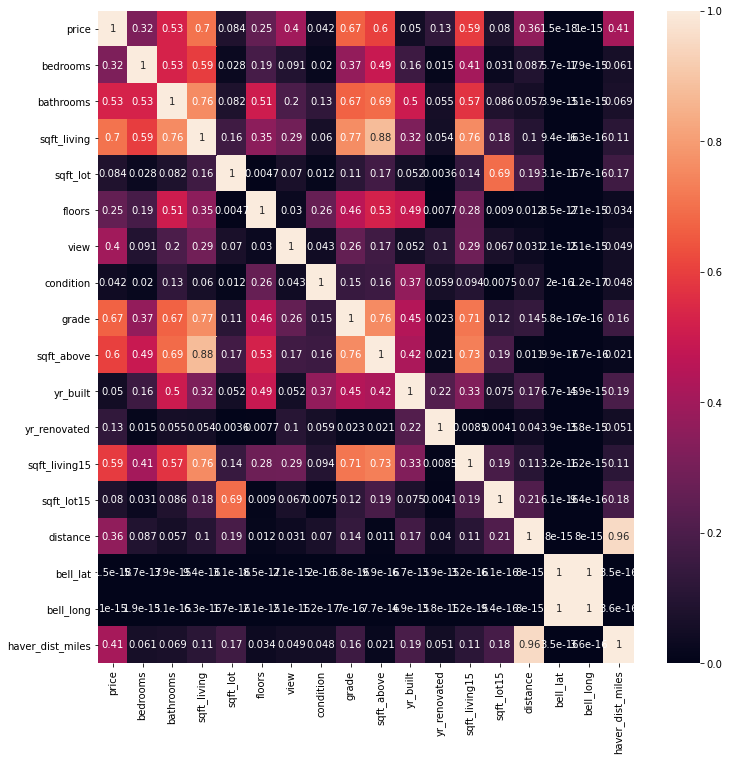

In [63]:
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_explore.corr().abs(), annot=True)

Heat maps give us a brief look at which independent variables will have multicollinearity issues.

## Modeling

### Simple Model

Model the variable that has the highest correlation with price, which is sqft_living

In [64]:
simple_formula='price ~ sqft_living'
simple_model = ols(simple_formula, df_train).fit()
simple_model_summ = simple_model.summary()
simple_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:06:36   Log-Likelihood:            -2.2504e+05
No. Observations:               16196   AIC:                         4.501e+05
Df Residuals:                   16194   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.726e+04   5117.509     -9.236      0.000   -5.73e+04   -3.72e+04
sqft_living   283.3842      2.248    126.049      0.000     278.977     287.791
==============================================================================
Omnibus:                    10297.337   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273144.164
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      22.422   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
simple_train_preds=simple_model.predict(X_train)
simple_test_preds=simple_model.predict(X_test)

In [66]:
print(f"Train R2: {r2_score(y_train, simple_train_preds)}")
print(f"Test R2: {r2_score(y_test, simple_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, simple_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, simple_test_preds, squared = False)}")



Train R2: 0.4952362517108303
Test R2: 0.48516570404881865
----
Train RMSE: 261959.4406716326
Test RMSE: 260030.04727585672


Interpretation: The simple model is a big improvement from the baseline. R2 is 0.50 for training data and 0.49 for testing data and the prediction is off by around 260 thousand dollars on average. The R2 is still low and the RMSE is still too high. Model needs iteration.

### Functions for modeling

#### Since we are doing a lot of assessment of our models, we can use a function for this repetitive work

In [74]:
#subfunction that takes a list of variables and give us a model for these variables
def model(ind_variable, data):
    
    ''' 
    Create a multiple linear regression model using a list of independent 
    variables and a dataframe
    ind_variable: a list of strings which correspond to the column names of the
    dataframe which are to be used as independent variables
    data = a dataframe which includes all of the relevant independent variables
    and the dependent variable   
    '''
    formula = 'price ~ ' + ' + '.join(ind_variable)
    multi_model = ols(formula, data).fit()
    multi_model_summ = multi_model.summary()
    return multi_model,multi_model_summ

In [75]:

# subfunction that does the assessment of the model
def assess1(model):
    
    '''
    This function takes in a model which was which was created by using statsmodels
    ols to fit, and and returns Mean Absolte Error and Root Mean Squared Error, as well
    as a residual plot.
    important: X training data (independent variables training data) in your 
    notebook/platform must be called "X_train" and X testing data 
    (independent variables training data) must be called "X_test". 
    Also, y training data must be called "y_train" (dependent variable) and y testing data must be called
    "y_test" (dependent variable). 
    '''
    tr_preds=model.predict(X_train)
    te_preds=model.predict(X_test)
    y_tr = y_train
    y_te = y_test
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

In [76]:
# scaled model was here
def scaled_model(ind_variable, data):
    ''' 
    Create a scaled multiple linear regression model using a list of independent 
    variables and a dataframe
    ind_variable: a list of strings which correspond to the column names of the
    dataframe which are to be used as independent variables
    data = a dataframe which includes all of the relevant independent variables
    and the dependent variable.   
    '''
    formula = 'price ~ ' + ' + '.join(ind_variable)
    data_scaled = (data - np.mean(data)) / np.std(data)
    model_scaled = ols(formula, data_scaled).fit()
    model_scaled_summ = model_scaled.summary()
    return model_scaled_summ

In [78]:
# the main function
def model_and_assess(ind_variable,data):
   '''
   Function which uses two other functions in order to create a multiple linear 
   regression, print the Root Mean Squared Error, Mean Absolute Error, R2, residual plot,
   and qqplot, as well as print out a statistical summary for both scaled and unscaled
   data which includes info about R2, p-values, multicollinearity, and coefficients.
   ind_variable: a list of strings which correspond to the column names of the
   dataframe which are to be used as independent variables
   data = a dataframe which includes all of the relevant independent variables
   and the dependent variable.  
    '''
    multi_model, multi_model_summ  = model(ind_variable,data)
    assessment = assess(multi_model)
    scaled_summ = scaled_model(ind_variable,data)
    qq = sm.graphics.qqplot(multi_model.resid, dist=stats.norm, line='45', fit=True)
    print('        ')
    print('This is the summary of the model')
    print('        ')
    print(multi_model_summ)   
    print('        ')
    print('This is the summary of the scaled model')
    print('        ')
    print(scaled_summ)        
    print('        ')
    print('This is the correlation table between variables')
    print('        ')
    print(data[ind_variable].corr())    
    print('        ')
    print('This is the residual plot and qq plot')
    print('        ')
    print(assessment)
    print(qq)

IndentationError: unexpected indent (<ipython-input-78-d571d8ae1d43>, line 13)

Check to see if the function works

Train R2: 0.4952362517108302
Test R2: 0.48516570404881854
----
Train RMSE: 261959.44067163262
Test RMSE: 260030.04727585675
----
Train MAE: 174968.58987369284
Test MAE: 172486.36266115913


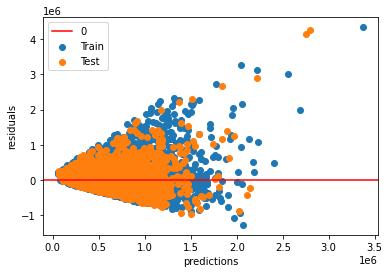

In [63]:
assess(simple_model)

In [72]:
model(['sqft_living'], df_explore)[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:10:05   Log-Likelihood:            -2.2504e+05
No. Observations:               16196   AIC:                         4.501e+05
Df Residuals:                   16194   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.726e+04   5117.509     -9.236      0.000   -5.73e+04   -3.72e+04
sqft_living   283.3842      2.248    126.049      0.000     278.977     287.791
==============================================================================
Omnibus:                    10297.337   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273144.164
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      22.422   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.4952362517108302
Test R2: 0.48516570404881854
----
Train RMSE: 261959.44067163262
Test RMSE: 260030.04727585675
----
Train MAE: 174968.58987369284
Test MAE: 172486.36266115913
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:48:29   Log-Likelihood:            -2.2504e+05
No. Observations:               16196   AIC:                         4.501e+05
Df Residuals:                   16194   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust             

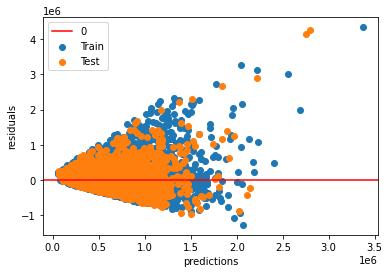

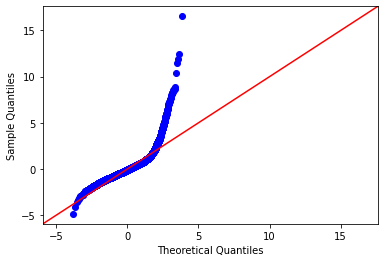

In [64]:
model_and_assess(['sqft_living'],df_explore)

### Two Approaches

- We can approach this model by adding features to the simple regression model (feed forward feature selection) or we can take the kitchen sink approach.

### Feed Forward Feature Selection Approach

### Add in location data

Distance has a very low correlation with sqft_living (0.14) and a negative correlation with price (-0.19), our target.

Train R2: 0.6077304967448809
Test R2: 0.5981243938789547
----
Train RMSE: 230931.0067411938
Test RMSE: 229739.47411447752
----
Train MAE: 147135.09777316594
Test MAE: 143682.89839908484
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:54:16   Log-Likelihood:            -2.2300e+05
No. Observations:               16196   AIC:                         4.460e+05
Df Residuals:                   16193   BIC:                         4.460e+05
Df Model:                           2                                         
Covariance Type:            nonrobust               

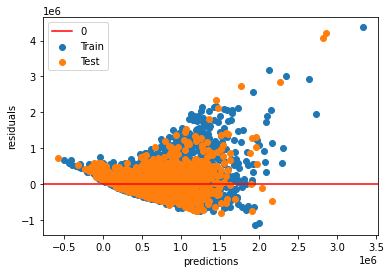

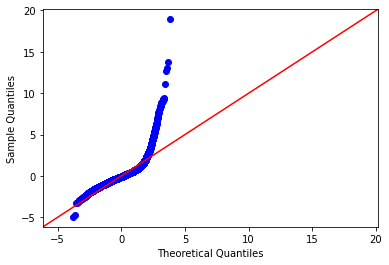

In [68]:
model_and_assess(['sqft_living', 'haver_dist_miles'],df_explore)

Interpretation:
- The sqft_living/distance model is a small improvement from the simple model based only on sqft_living. R2 increased from 0.50 to 0.60 for training data and 0.49 to 0.59 for testing data. The prediction is off by around 230 thousand dollars on average. The R2 is average and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the error seems to be worse for houses at both end of the price spectrum and we need to find a way to account for that

In [66]:
# check to see where the expensive houses (1.5M +) are 
fig_expensive = px.scatter_mapbox(df[df['price']>1500000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig_expensive.update_layout(mapbox_style='open-street-map')
fig_expensive.show()

It seems that the most expensive houses are either next to the mountain or next to the water, so let's try taking into account the 'view' column.

Train R2: 0.6467330787322703
Test R2: 0.6396680259091313
----
Train RMSE: 219149.99387318137
Test RMSE: 217541.0400138848
----
Train MAE: 139987.580405198
Test MAE: 135723.3044638567
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     9881.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:56:49   Log-Likelihood:            -2.2215e+05
No. Observations:               16196   AIC:                         4.443e+05
Df Residuals:                   16192   BIC:                         4.443e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                  

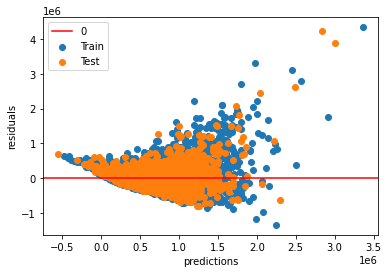

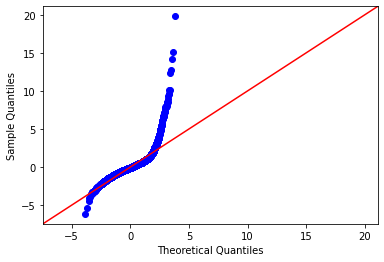

In [69]:
model_and_assess(['sqft_living', 'haver_dist_miles', 'view'], df_explore)

Interpretation:
- The sqft_living/distance model is a small improvement from the simple model based only on sqft_living. R2 increased from 0.60 to 0.647 for training data and 0.59 to 0.63 for testing data. The prediction is off by around 218 thousand dollars on average. The R2 is still average and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the error still seems to be worse for houses at both end of the price spectrum and this model is still not accounting for it
- max correlation between independent variables is 0.29, acceptable.

#### Check how the condition of houses affects price

Condition has low correlation with existing variables (sqft_living, haver_dist_miles, view) so let's add that in and see what happens.

Train R2: 0.6495765838522822
Test R2: 0.6402732413369554
----
Train RMSE: 218266.2242184491
Test RMSE: 217358.27171491022
----
Train MAE: 139360.4109702606
Test MAE: 135575.83970513314
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     7503.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:01:03   Log-Likelihood:            -2.2209e+05
No. Observations:               16196   AIC:                         4.442e+05
Df Residuals:                   16191   BIC:                         4.442e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                

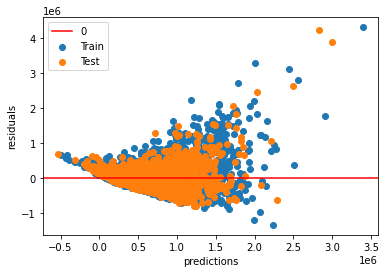

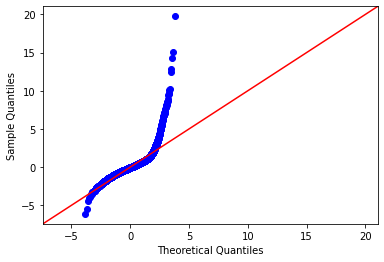

In [70]:
model_and_assess(['sqft_living', 'haver_dist_miles', 'view', 'condition'], df_explore)

Interpretation:
- The model is a tiny improvement from the previous one. R2 increased from 0.647 to 0.650 for training data, but R2 for testing data is basically the same. The R2 is still average and the RMSE is still too high. Model needs iteration.
- The error is not homoskatistic, the error still seems to be worse for houses at both end of the price spectrum and this model is still not accounting for it
- max correlation between independent variables is 0.29, acceptable.

### Feature Engineering

Now we seems to run out of variables to add without having a collinearity probolem, so we need to start looking into feature engineering.

sqft_living, bedrooms, bathrooms and grade has high correlations with each other as well as our target price, so let's find a way to account for them while adhereing to linear regression assumptions.

In [71]:
# look at out training dataset with these 5 features
df_coll=df_explore[['price','sqft_living', 'bedrooms', 'bathrooms', 'grade']]
df_coll

price  sqft_living  bedrooms  bathrooms  grade
2358    234000.0         1040         3       1.00      7
6405    529000.0         1880         3       2.50      8
937     253000.0         2020         3       2.50      7
19076   745000.0         4720         5       4.00      9
18799   855000.0         2190         4       2.25      8
...          ...          ...       ...        ...    ...
11964   440000.0         2230         3       2.50      7
21577  1090000.0         4170         5       3.75     10
5390    299800.0         1530         4       1.50      6
860     245000.0          380         1       0.75      5
15796   133000.0         1430         5       2.00      6

[16196 rows x 5 columns]

In [72]:
# find correlation between columns
df_coll.corr()

price  sqft_living  bedrooms  bathrooms     grade
price        1.000000     0.703730  0.318156   0.529581  0.669421
sqft_living  0.703730     1.000000  0.594390   0.761228  0.765367
bedrooms     0.318156     0.594390  1.000000   0.528151  0.368958
bathrooms    0.529581     0.761228  0.528151   1.000000  0.669794
grade        0.669421     0.765367  0.368958   0.669794  1.000000

______________________________________________________________________________________________________________________________

There's a high correlation between sqft_living and grade, so let's make a new column called sqft_grade to indicate the square footage of a house weighted by its construction quality it is.

In [73]:
# Add column sqft_grade
X_train['sqft_grade']=X_train['sqft_living']*X_train['grade']
X_test['sqft_grade']=X_test['sqft_living']*X_test['grade']

<ipython-input-73-c48a59884103>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-c48a59884103>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
# Add column sqft_grade in our df_explore as well
df_explore['sqft_grade'] = df_explore['sqft_living'] * df_explore['grade']

Now let's build a model with this new feature instead of sqft_living and see if we get better results

Train R2: 0.7065767839662731
Test R2: 0.7051685392749507
----
Train RMSE: 199727.19949846916
Test RMSE: 196778.076950891
----
Train MAE: 128394.34818520345
Test MAE: 124150.89871135408
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     9747.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:05:47   Log-Likelihood:            -2.2065e+05
No. Observations:               16196   AIC:                         4.413e+05
Df Residuals:                   16191   BIC:                         4.413e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                

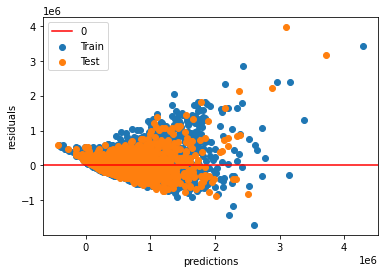

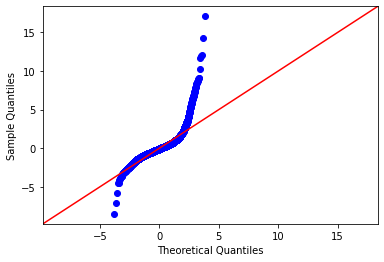

In [75]:
model_and_assess(['sqft_grade', 'haver_dist_miles', 'view', 'condition'], df_explore)

Interpretation:
- The model is a small improvement from the previous one. R2 increased from 0.650 to 0.70 for training data and from 0.64 to 0.70 for the testing data. 
- The error is not homoskatistic, the error still seems to be worse for houses at both end of the price spectrum and this model is still not accounting for it
- max correlation between independent variables is 0.30, still acceptable.

### Kitchen Sink Approach

Train R2: 0.7037219679604004
Test R2: 0.6910354185962096
----
Train RMSE: 200696.45516822778
Test RMSE: 201439.27426940575
----
Train MAE: 126189.47288899418
Test MAE: 123655.87594945915
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2957.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:08:50   Log-Likelihood:            -2.2073e+05
No. Observations:               16196   AIC:                         4.415e+05
Df Residuals:                   16182   BIC:                         4.416e+05
Df Model:                          13                                         
Covariance Type:            nonrobust              

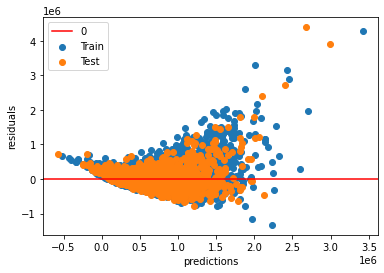

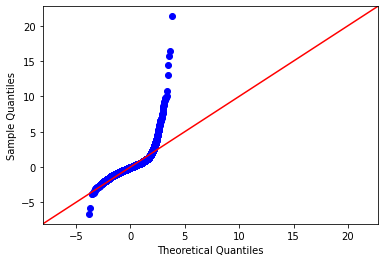

In [76]:
# put all the relevant columns in the model
model_and_assess(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'haver_dist_miles'], df_explore)

Interpretation: 
- The R2 remains at 0.70, but the multicollinearity is very high as well.
- The error is not homoskadastic.

### Log Transformation

Since price looks log normally distributed, we want to see if log transforming price would fix our error problem.

In [77]:
y_train_log=np.log(y_train)
y_train_log

2358     12.363076
6405     13.178744
937      12.441145
19076    13.521139
18799    13.658857
           ...    
11964    12.994530
21577    13.901688
5390     12.610871
860      12.409013
15796    11.798104
Name: price, Length: 16196, dtype: float64

In [78]:
df_log_train=pd.concat([y_train_log,X_train],axis=1)
df_log_train

price        date  bedrooms  bathrooms  sqft_living  sqft_lot  \
2358   12.363076   3/25/2015         3       1.00         1040      8122   
6405   13.178744    3/4/2015         3       2.50         1880      4499   
937    12.441145   10/7/2014         3       2.50         2020      6564   
19076  13.521139   1/16/2015         5       4.00         4720    493534   
18799  13.658857   6/18/2014         4       2.25         2190      4080   
...          ...         ...       ...        ...          ...       ...   
11964  12.994530   9/15/2014         3       2.50         2230      5800   
21577  13.901688   3/17/2015         5       3.75         4170      8142   
5390   12.610871   7/21/2014         4       1.50         1530      9000   
860    12.409013   6/20/2014         1       0.75          380     15000   
15796  11.798104  12/20/2014         5       2.00         1430      5600   

       floors waterfront  view  condition  ...  zipcode      lat     long  \
2358      1.0         NO     1          5  ...    98198  47.3731 -122.312   
6405      2.0         NO     1          3  ...    98029  47.5664 -121.999   
937       1.0         NO     1          3  ...    98042  47.3545 -122.158   
19076     2.0         NO     1          5  ...    98027  47.4536 -122.009   
18799     2.0         NO     1          3  ...    98119  47.6425 -122.358   
...       ...        ...   ...        ...  ...      ...      ...      ...   
11964     2.0         NO     1          3  ...    98065  47.5308 -121.847   
21577     2.0         NO     3          3  ...    98056  47.5354 -122.181   
5390      1.0         NO     1          4  ...    98014  47.6492 -121.908   
860       1.0         NO     1          3  ...    98168  47.4810 -122.323   
15796     1.5         NO     1          3  ...    98118  47.5192 -122.266   

       sqft_living15  sqft_lot15  distance  bell_lat  bell_long  \
2358            1470        8676  0.261494   47.6101  -122.2015   
6405            2130        5114  0.207162   47.6101  -122.2015   
937             1710        5151  0.259275   47.6101  -122.2015   
19076           2160      219542  0.248090   47.6101  -122.2015   
18799           2100        4080  0.159819   47.6101  -122.2015   
...              ...         ...       ...       ...        ...   
11964           2230        6088  0.363261   47.6101  -122.2015   
21577           3030        7980  0.077462   47.6101  -122.2015   
5390            1520        8500  0.296093   47.6101  -122.2015   
860             1170       15000  0.177282   47.6101  -122.2015   
15796           1860        5980  0.111459   47.6101  -122.2015   

       haver_dist_miles  sqft_grade  
2358          17.165235        7280  
6405           9.905938       15040  
937           17.773286       14140  
19076         14.053175       42480  
18799          7.622261       17520  
...                 ...         ...  
11964         17.406701       15610  
21577          5.247985       41700  
5390          13.928145        9180  
860           10.565630        1900  
15796          6.962017        8580  

[16196 rows x 25 columns]

In [80]:
y_test_log=np.log(y_test)
df_log_test=pd.concat([y_test_log,X_test],axis=1)
df_log_test

price       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
3686   11.794338  2/20/2015         3       0.75          850      8573   
10246  12.656989   5/6/2014         3       1.00         1510      6083   
4037   13.110291  3/25/2015         4       2.25         1790     42000   
3437   12.779873  2/17/2015         2       1.50         1140      2500   
19291  13.314635  5/23/2014         3       1.00         1500      3920   
...          ...        ...       ...        ...          ...       ...   
8476   12.745486  4/17/2015         3       1.00         1410     18600   
11717  14.272935  6/23/2014         4       2.50         4570     74487   
13876  12.833347  6/25/2014         3       2.25         1400     11400   
13478  14.100690  3/24/2015         4       2.25         3260      4640   
15372  13.641752  7/15/2014         4       2.25         2290     12174   

       floors waterfront  view  condition  ...  zipcode      lat     long  \
3686      1.0         NO     1          3  ...    98146  47.5030 -122.356   
10246     1.0         NO     1          4  ...    98115  47.6966 -122.324   
4037      1.0         NO     1          3  ...    98045  47.4819 -121.744   
3437      1.0         NO     2          3  ...    98106  47.5707 -122.359   
19291     1.0         NO     1          3  ...    98107  47.6718 -122.359   
...       ...        ...   ...        ...  ...      ...      ...      ...   
8476      1.0         NO     1          5  ...    98059  47.5031 -122.152   
11717     2.0         NO     5          5  ...    98177  47.7282 -122.372   
13876     2.0         NO     1          3  ...    98028  47.7428 -122.231   
13478     2.0         NO     1          5  ...    98112  47.6272 -122.312   
15372     1.0        YES     5          3  ...    98178  47.5114 -122.245   

       sqft_living15  sqft_lot15  distance  bell_lat  bell_long  \
3686             850        8382  0.187991   47.6101  -122.2015   
10246           1510        5712  0.149962   47.6101  -122.2015   
4037            2060       50094  0.475123   47.6101  -122.2015   
3437            1500        5000  0.162353   47.6101  -122.2015   
19291           1640        4017  0.169154   47.6101  -122.2015   
...              ...         ...       ...       ...        ...   
8476            1610       24941  0.117895   47.6101  -122.2015   
11717           3810       74487  0.207407   47.6101  -122.2015   
13876           2180        9248  0.135939   47.6101  -122.2015   
13478           3240        5800  0.111815   47.6101  -122.2015   
15372           2290        9379  0.107861   47.6101  -122.2015   

       haver_dist_miles  sqft_grade  
3686          10.325535        5100  
10246          8.258305        9060  
4037          23.097921       12530  
3437           7.826352        7980  
19291          8.479772       10500  
...                 ...         ...  
8476           7.743429        9870  
11717         11.378405       54840  
13876          9.269056       11200  
13478          5.279210       29340  
15372          7.113360       16030  

[5399 rows x 25 columns]

#### Here we added functions that we can use to model data that has undergone log transformations

In [81]:
def assess_log(model):
    
    tr_preds=model.predict(X_train)
    te_preds=model.predict(X_test)
    y_tr = y_train_log
    y_te = y_test_log
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

In [82]:
#modify our function to fit the log transformation
def model_and_assess_log(ind_variable,data):
    multi_model, multi_model_summ = model(ind_variable,data)
    assessment = assess_log(multi_model)
    scaled_summ = scaled_model(ind_variable,data)
    qq = sm.graphics.qqplot(multi_model.resid, dist=stats.norm, line='45', fit=True)
    print('        ')
    print('This is the summary of the model')
    print('        ')
    print(multi_model_summ)
    print('        ')
    print('This is the summary of the scaled model')
    print('        ')
    print(scaled_summ)
    print('        ')
    print('This is the correlation table between variables')
    print('        ')
    print(data[ind_variable].corr())
    print('        ')
    print('This is the residual plot and qq plot')
    print('        ')
    print(assessment)
    print(qq)

## Kitchen Sink Model using Log transformated price

Train R2: 0.7664225873232766
Test R2: 0.7609832976408447
----
Train RMSE: 0.2555708065779213
Test RMSE: 0.25377976013442216
----
Train MAE: 0.19704069355441592
Test MAE: 0.19624477673950977
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     4084.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:12:13   Log-Likelihood:                -885.64
No. Observations:               16196   AIC:                             1799.
Df Residuals:                   16182   BIC:                             1907.
Df Model:                          13                                         
Covariance Type:            nonrobust           

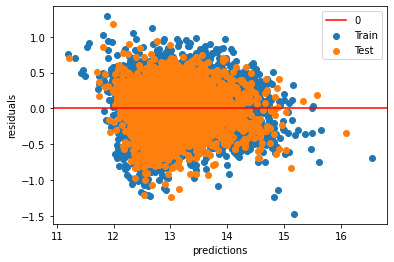

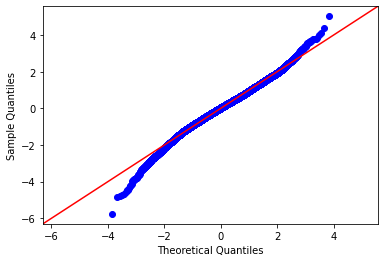

In [83]:
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'haver_dist_miles'], df_log_train)

###### Interpretation

- This model gives us our highest R2 score yet with .766

- This model does suffer from multicollinearity 

- The errors are homoskedastic in this model

- sqft_above is not statistically significant due to its p-value being .46, so we will remove it in our next model

Train R2: 0.7664147237748036
Test R2: 0.7609832645398756
----
Train RMSE: 0.25557510852751614
Test RMSE: 0.25377977770716004
----
Train MAE: 0.19704139207519764
Test MAE: 0.19624755020045928
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     4425.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:17:24   Log-Likelihood:                -885.91
No. Observations:               16196   AIC:                             1798.
Df Residuals:                   16183   BIC:                             1898.
Df Model:                          12                                         
Covariance Type:            nonrobust          

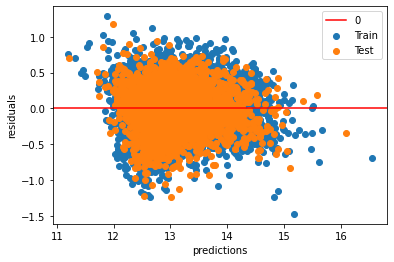

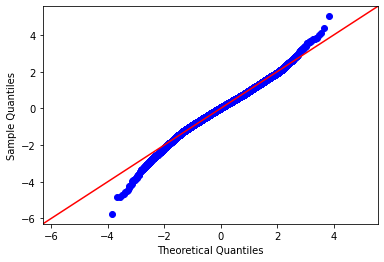

In [84]:
# drop the sqft_above feature
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'haver_dist_miles'], df_log_train)

Interpretation
- Removing sqft_above did not change our R2 value but it did reduce the multicollinearity

In [81]:
df_explore['view_sqft_living'] = df_explore['view'] * df_explore ['sqft_living']

Here we multiply our 'view' and 'sqft_living' columns to create a new feature

In [82]:
# Add interaction variable for view and sqft_living
X_train['view_sqft_living'] = X_train['view'] * X_train['sqft_living']
X_test['view_sqft_living'] = X_test['view'] * X_test['sqft_living']
# Add interaction term for view and sqft_living in df_log_train
df_log_train['view_sqft_living'] = df_log_train['view'] * df_log_train['sqft_living']

<ipython-input-82-689ea17634fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-689ea17634fc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Test the model with our new view_sqft_living variable before log transforming 'price'.

Train R2: 0.7056678354220263
Test R2: 0.7052912906757088
----
Train RMSE: 200036.31166549993
Test RMSE: 196737.10897002305
----
Train MAE: 127330.4642482497
Test MAE: 126555.6169121329
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     2771.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:11:30   Log-Likelihood:            -2.2067e+05
No. Observations:               16196   AIC:                         4.414e+05
Df Residuals:                   16181   BIC:                         4.415e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                

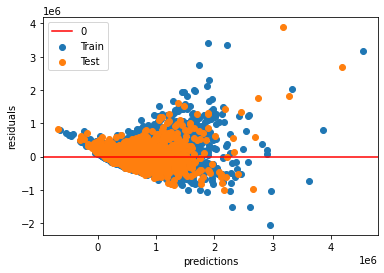

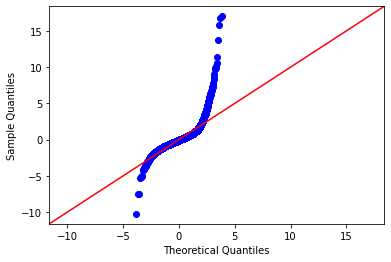

In [83]:
model_and_assess(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance', 'view_sqft_living'], df_explore)

Interpret model

- Our R2 dropped and our model has some multicollinearity

- Errors are not homoskedastic

Here we use the same feature variables but we log transform our price variable

Train R2: 0.7288065302367817
Test R2: 0.7194890581344617
----
Train RMSE: 0.2753819276883812
Test RMSE: 0.27492723267466024
----
Train MAE: 0.21578221942878598
Test MAE: 0.21591842743655335
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     3106.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:11:31   Log-Likelihood:                -2094.8
No. Observations:               16196   AIC:                             4220.
Df Residuals:                   16181   BIC:                             4335.
Df Model:                          14                                         
Covariance Type:            nonrobust           

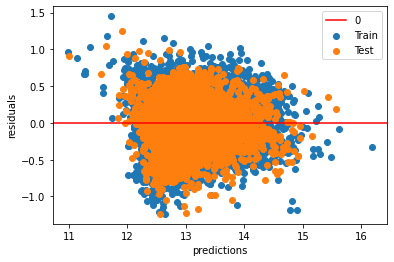

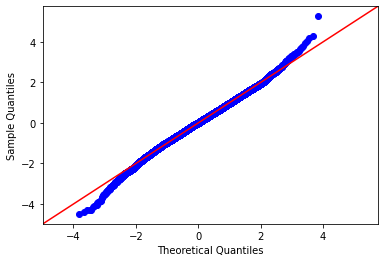

In [84]:
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance', 'view_sqft_living'], df_log_train)

Interpretation
- Log transforming our target boosted our score to .729

- The errors are homoskedastic

_______________________________________________________________________________________________________________________________

The model below does not have a log transformed target variable and we removed the sqft_above variable 

Train R2: 0.6888814905260847
Test R2: 0.6732620964484313
----
Train RMSE: 205661.45351891292
Test RMSE: 207152.2043347545
----
Train MAE: 131319.36666122766
Test MAE: 129188.33930929711
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2986.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:11:33   Log-Likelihood:            -2.2112e+05
No. Observations:               16196   AIC:                         4.423e+05
Df Residuals:                   16183   BIC:                         4.424e+05
Df Model:                          12                                         
Covariance Type:            nonrobust               

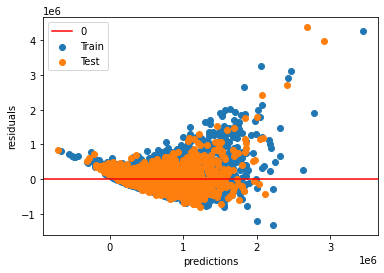

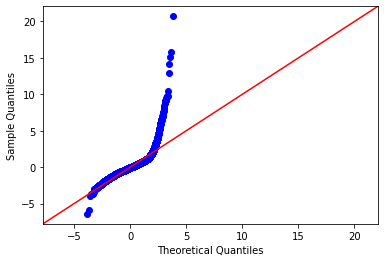

In [85]:
model_and_assess(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance'], df_explore)

Interpretation: 
- Errors are not homoskedastic 

- We can tell that sqft_lot15 is not a significant feature in this model due to the P_value of 0.477

- There is some multicollinearity

-------------------------------------------------------------------------

Then we tried the same model with a log transformed 'price' variable.

Train R2: 0.7273259643543407
Test R2: 0.7176348169203339
----
Train RMSE: 0.27613262076052786
Test RMSE: 0.27583440180761143
----
Train MAE: 0.21622449060091184
Test MAE: 0.21667433185557425
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     3597.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:11:35   Log-Likelihood:                -2138.9
No. Observations:               16196   AIC:                             4304.
Df Residuals:                   16183   BIC:                             4404.
Df Model:                          12                                         
Covariance Type:            nonrobust          

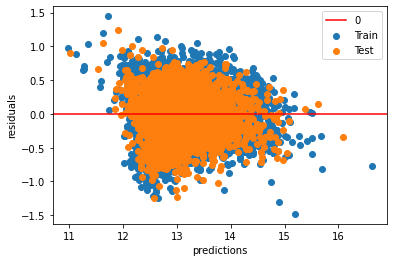

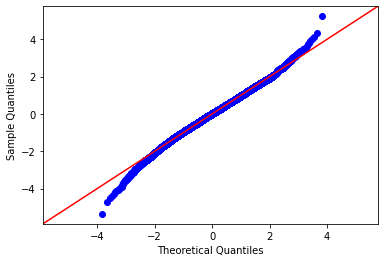

In [86]:
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'distance'], df_log_train)

Interpretation
- Log transforming our target seems to result in the errors being homoskedastic and our R2 score going up.
- Multi Collinearity still persists.

_____________________________________________________________________________________________________________

Here we took out 'sqft_living15' and 'sqft_lot15', and we are keeping our target log transformed. 

Train R2: 0.7232309274896778
Test R2: 0.7148251298909871
----
Train RMSE: 0.27819838278906056
Test RMSE: 0.27720335588120576
----
Train MAE: 0.21757845941084142
Test MAE: 0.21741062477857614
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     4229.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:11:37   Log-Likelihood:                -2259.6
No. Observations:               16196   AIC:                             4541.
Df Residuals:                   16185   BIC:                             4626.
Df Model:                          10                                         
Covariance Type:            nonrobust          

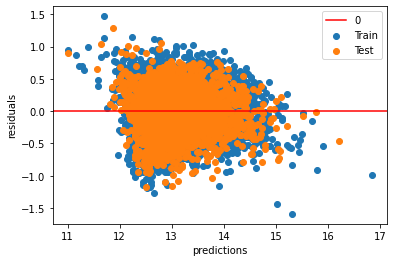

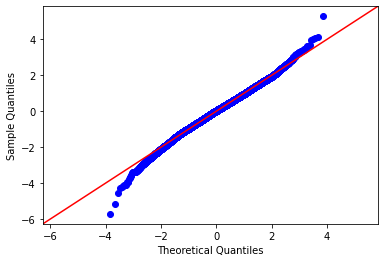

In [87]:
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'distance'], df_log_train)

Our R2 score dropped by .04 and our errors are still homoskedastic.

In [89]:
y_train

2358      234000.0
6405      529000.0
937       253000.0
19076     745000.0
18799     855000.0
           ...    
11964     440000.0
21577    1090000.0
5390      299800.0
860       245000.0
15796     133000.0
Name: price, Length: 16196, dtype: float64

To account for the skewness in certain variables, we want to see if log transformation can fix it. 

In [90]:
# Selected the most important variables for pairplot because it would be too big
df_col = list(df.columns)
drop_col = ['yr_renovated', 'date', 'waterfront', 'sqft_basement', 'yr_built', 'zipcode']
df_rcol = list(set(df_col) - set(drop_col))
len(df_col)

24

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning:

Attempting to set identical left == right == 47.6101 results in singular transformations; automatically expanding.

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning:

Attempting to set identical left == right == -122.2015 results in singular transformations; automatically expanding.

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning:

Attempting to set identical bottom == top == 47.6101 results in singular transformations; automatically expanding.

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning:

Attempting to set identical left == right == 47.6101 results in singular transformations; automatically expanding.

/Users/brookes

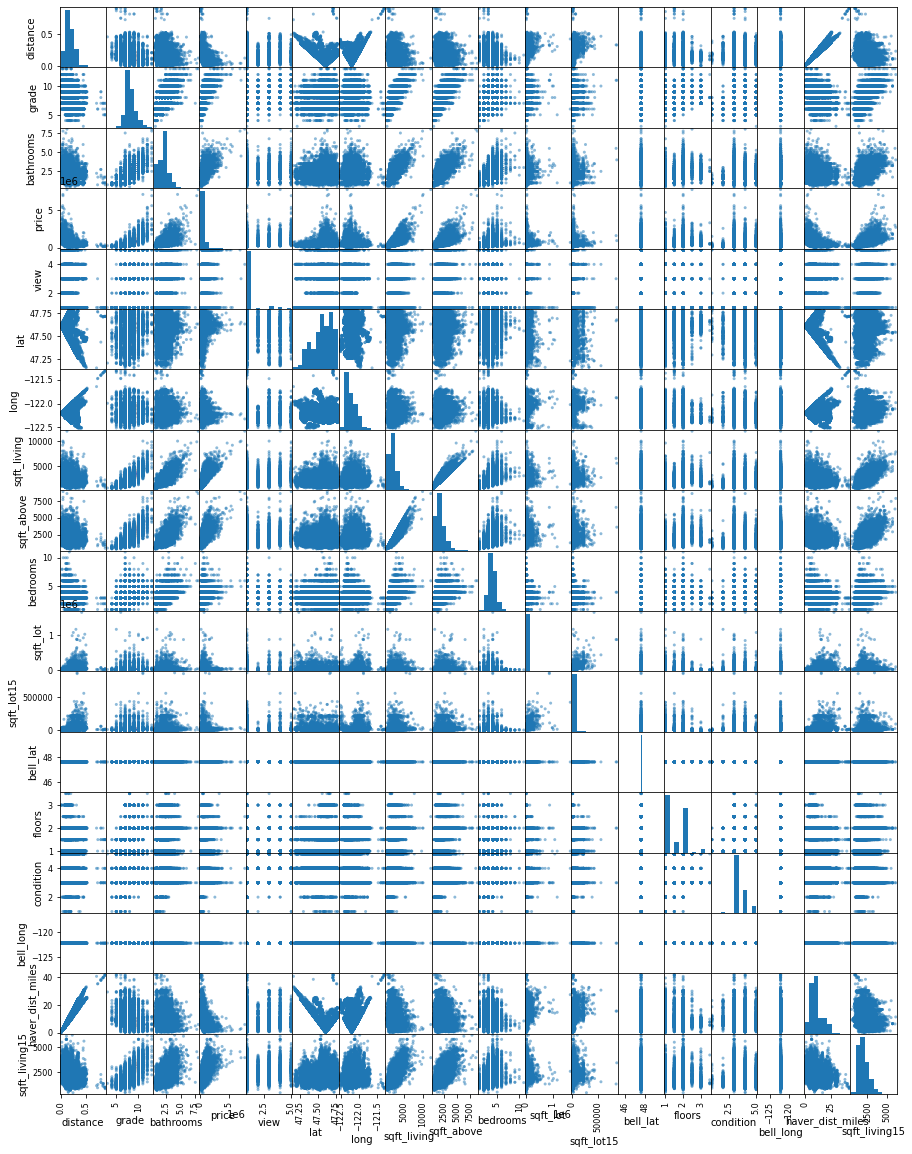

In [91]:
# Distributions of variables
pd.plotting.scatter_matrix(df[df_rcol], figsize=(15,20));

### Adding log transformed features to X_train and X_test

In [92]:
# Add logged variables to X_train
var_log = ['bathrooms','sqft_living','sqft_lot', 'floors', 'view', 'condition', 
           'sqft_above','yr_built', 'sqft_living15', 'sqft_lot15']
for var in var_log:
    X_train[var+'_log'] = X_train[var].map(lambda x: np.log(x))
X_train.head()

<ipython-input-92-05e7dba54e57>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
2358   3/25/2015         3       1.00         1040      8122     1.0   
6405    3/4/2015         3       2.50         1880      4499     2.0   
937    10/7/2014         3       2.50         2020      6564     1.0   
19076  1/16/2015         5       4.00         4720    493534     2.0   
18799  6/18/2014         4       2.25         2190      4080     2.0   

      waterfront  view  condition  grade  ...  bathrooms_log sqft_living_log  \
2358          NO     1          5      7  ...       0.000000        6.946976   
6405          NO     1          3      8  ...       0.916291        7.539027   
937           NO     1          3      7  ...       0.916291        7.610853   
19076         NO     1          5      9  ...       1.386294        8.459564   
18799         NO     1          3      8  ...       0.810930        7.691657   

       sqft_lot_log  floors_log  view_log  condition_log  sqft_above_log  \
2358       9.002332    0.000000       0.0       1.609438        6.946976   
6405       8.411610    0.693147       0.0       1.098612        7.539027   
937        8.789355    0.000000       0.0       1.098612        7.177782   
19076     13.109347    0.693147       0.0       1.609438        8.283999   
18799      8.313852    0.693147       0.0       1.098612        7.495542   

       yr_built_log  sqft_living15_log  sqft_lot15_log  
2358       7.586296           7.293018        9.068316  
6405       7.597396           7.663877        8.539737  
937        7.597898           7.444249        8.546946  
19076      7.588324           7.677864       12.299299  
18799      7.559038           7.649693        8.313852  

[5 rows x 35 columns]

In [93]:
# Add logged variables to X_test
var_log = ['bathrooms','sqft_living','sqft_lot', 'floors', 'view', 'condition', 
           'sqft_above','yr_built', 'sqft_living15', 'sqft_lot15']
for var in var_log:
    X_test[var+'_log'] = X_test[var].map(lambda x: np.log(x))
X_test.head()

<ipython-input-93-0f30b6e232dc>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3686   2/20/2015         3       0.75          850      8573     1.0   
10246   5/6/2014         3       1.00         1510      6083     1.0   
4037   3/25/2015         4       2.25         1790     42000     1.0   
3437   2/17/2015         2       1.50         1140      2500     1.0   
19291  5/23/2014         3       1.00         1500      3920     1.0   

      waterfront  view  condition  grade  ...  bathrooms_log sqft_living_log  \
3686          NO     1          3      6  ...      -0.287682        6.745236   
10246         NO     1          4      6  ...       0.000000        7.319865   
4037          NO     1          3      7  ...       0.810930        7.489971   
3437          NO     2          3      7  ...       0.405465        7.038784   
19291         NO     1          3      7  ...       0.000000        7.313220   

       sqft_lot_log  floors_log  view_log  condition_log  sqft_above_log  \
3686       9.056373         0.0  0.000000       1.098612        6.396930   
10246      8.713253         0.0  0.000000       1.386294        6.756932   
4037      10.645425         0.0  0.000000       1.098612        7.064759   
3437       7.824046         0.0  0.693147       1.098612        6.445720   
19291      8.273847         0.0  0.000000       1.098612        6.907755   

       yr_built_log  sqft_living15_log  sqft_lot15_log  
3686       7.573017           6.745236        9.033842  
10246      7.570443           7.319865        8.650325  
4037       7.592366           7.630461       10.821657  
3437       7.594884           7.313220        8.517193  
19291      7.574045           7.402452        8.298291  

[5 rows x 35 columns]

- features that need log transform: bathrooms, sqft_living, sqft_lot, floors, view, condition,sqft_above, yr_built, sqft_living15, sqft_lot15.

In [94]:
X_train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'distance', 'bell_lat', 'bell_long',
       'haver_dist_miles', 'sqft_grade', 'view_sqft_living', 'bathrooms_log',
       'sqft_living_log', 'sqft_lot_log', 'floors_log', 'view_log',
       'condition_log', 'sqft_above_log', 'yr_built_log', 'sqft_living15_log',
       'sqft_lot15_log'],
      dtype='object')

In [95]:
# make a new df_train that includes these log columns
df_train=pd.concat([y_train, X_train], axis = 1)

In [96]:
df_train.columns

Index(['price', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'distance', 'bell_lat', 'bell_long',
       'haver_dist_miles', 'sqft_grade', 'view_sqft_living', 'bathrooms_log',
       'sqft_living_log', 'sqft_lot_log', 'floors_log', 'view_log',
       'condition_log', 'sqft_above_log', 'yr_built_log', 'sqft_living15_log',
       'sqft_lot15_log'],
      dtype='object')

In [97]:
# look at the correlation between independent variables and target
df_train.corr()['price'].sort_values(ascending=False)

price                1.000000e+00
sqft_grade           7.567641e-01
sqft_living          7.037302e-01
grade                6.694215e-01
view_sqft_living     6.363288e-01
sqft_living_log      6.155180e-01
sqft_above           6.033809e-01
sqft_living15        5.905399e-01
sqft_living15_log    5.488874e-01
sqft_above_log       5.443201e-01
bathrooms            5.295813e-01
bathrooms_log        4.599725e-01
view                 3.998799e-01
view_log             3.894454e-01
bedrooms             3.181560e-01
lat                  3.037320e-01
floors_log           2.645305e-01
floors               2.545631e-01
sqft_lot_log         1.634512e-01
sqft_lot15_log       1.490321e-01
yr_renovated         1.310640e-01
sqft_lot             8.442100e-02
sqft_lot15           8.023390e-02
yr_built             4.970024e-02
yr_built_log         4.844668e-02
condition_log        4.176823e-02
condition            4.151430e-02
long                 2.053157e-02
bell_lat             1.521181e-18
bell_long     

In [98]:
# select columns 
# drop the ones that are not numeric
df_logged_KS=df_train.drop(['date', 'waterfront','zipcode', 'lat', 'long', 'sqft_basement'],axis=1)

In [99]:
# check correlations
df_logged_KS.corr()['price'].sort_values(ascending=False)

price                1.000000e+00
sqft_grade           7.567641e-01
sqft_living          7.037302e-01
grade                6.694215e-01
view_sqft_living     6.363288e-01
sqft_living_log      6.155180e-01
sqft_above           6.033809e-01
sqft_living15        5.905399e-01
sqft_living15_log    5.488874e-01
sqft_above_log       5.443201e-01
bathrooms            5.295813e-01
bathrooms_log        4.599725e-01
view                 3.998799e-01
view_log             3.894454e-01
bedrooms             3.181560e-01
floors_log           2.645305e-01
floors               2.545631e-01
sqft_lot_log         1.634512e-01
sqft_lot15_log       1.490321e-01
yr_renovated         1.310640e-01
sqft_lot             8.442100e-02
sqft_lot15           8.023390e-02
yr_built             4.970024e-02
yr_built_log         4.844668e-02
condition_log        4.176823e-02
condition            4.151430e-02
bell_lat             1.521181e-18
bell_long           -9.996045e-16
distance            -3.595061e-01
haver_dist_mil

In [100]:
# drop the duplicated columns
df_logged_KS=df_logged_KS[['price','bedrooms', 'grade', 'bathrooms_log', 'sqft_living_log', 'sqft_lot_log', 'floors_log', 'view_log',
                      'condition_log', 'sqft_above_log', 'yr_built_log', 'sqft_living15_log', 'sqft_lot15_log', 'distance']]
df_logged_KS

price  bedrooms  grade  bathrooms_log  sqft_living_log  \
2358    234000.0         3      7       0.000000         6.946976   
6405    529000.0         3      8       0.916291         7.539027   
937     253000.0         3      7       0.916291         7.610853   
19076   745000.0         5      9       1.386294         8.459564   
18799   855000.0         4      8       0.810930         7.691657   
...          ...       ...    ...            ...              ...   
11964   440000.0         3      7       0.916291         7.709757   
21577  1090000.0         5     10       1.321756         8.335671   
5390    299800.0         4      6       0.405465         7.333023   
860     245000.0         1      5      -0.287682         5.940171   
15796   133000.0         5      6       0.693147         7.265430   

       sqft_lot_log  floors_log  view_log  condition_log  sqft_above_log  \
2358       9.002332    0.000000  0.000000       1.609438        6.946976   
6405       8.411610    0.693147  0.000000       1.098612        7.539027   
937        8.789355    0.000000  0.000000       1.098612        7.177782   
19076     13.109347    0.693147  0.000000       1.609438        8.283999   
18799      8.313852    0.693147  0.000000       1.098612        7.495542   
...             ...         ...       ...            ...             ...   
11964      8.665613    0.693147  0.000000       1.098612        7.709757   
21577      9.004791    0.693147  1.098612       1.098612        8.335671   
5390       9.104980    0.000000  0.000000       1.386294        7.333023   
860        9.615805    0.000000  0.000000       1.098612        5.940171   
15796      8.630522    0.405465  0.000000       1.098612        7.265430   

       yr_built_log  sqft_living15_log  sqft_lot15_log  distance  
2358       7.586296           7.293018        9.068316  0.261494  
6405       7.597396           7.663877        8.539737  0.207162  
937        7.597898           7.444249        8.546946  0.259275  
19076      7.588324           7.677864       12.299299  0.248090  
18799      7.559038           7.649693        8.313852  0.159819  
...             ...                ...             ...       ...  
11964      7.602900           7.709757        8.714075  0.363261  
21577      7.603898           8.016318        8.984694  0.077462  
5390       7.588830           7.326466        9.047821  0.296093  
860        7.582229           7.064759        9.615805  0.177282  
15796      7.574045           7.528332        8.696176  0.111459  

[16196 rows x 14 columns]

In [101]:
# drop the log values that has low correlations with the price
df_logged_KS=df_logged_KS.drop(['yr_built_log','condition_log'], axis=1)

In [102]:
df_logged_KS

price  bedrooms  grade  bathrooms_log  sqft_living_log  \
2358    234000.0         3      7       0.000000         6.946976   
6405    529000.0         3      8       0.916291         7.539027   
937     253000.0         3      7       0.916291         7.610853   
19076   745000.0         5      9       1.386294         8.459564   
18799   855000.0         4      8       0.810930         7.691657   
...          ...       ...    ...            ...              ...   
11964   440000.0         3      7       0.916291         7.709757   
21577  1090000.0         5     10       1.321756         8.335671   
5390    299800.0         4      6       0.405465         7.333023   
860     245000.0         1      5      -0.287682         5.940171   
15796   133000.0         5      6       0.693147         7.265430   

       sqft_lot_log  floors_log  view_log  sqft_above_log  sqft_living15_log  \
2358       9.002332    0.000000  0.000000        6.946976           7.293018   
6405       8.411610    0.693147  0.000000        7.539027           7.663877   
937        8.789355    0.000000  0.000000        7.177782           7.444249   
19076     13.109347    0.693147  0.000000        8.283999           7.677864   
18799      8.313852    0.693147  0.000000        7.495542           7.649693   
...             ...         ...       ...             ...                ...   
11964      8.665613    0.693147  0.000000        7.709757           7.709757   
21577      9.004791    0.693147  1.098612        8.335671           8.016318   
5390       9.104980    0.000000  0.000000        7.333023           7.326466   
860        9.615805    0.000000  0.000000        5.940171           7.064759   
15796      8.630522    0.405465  0.000000        7.265430           7.528332   

       sqft_lot15_log  distance  
2358         9.068316  0.261494  
6405         8.539737  0.207162  
937          8.546946  0.259275  
19076       12.299299  0.248090  
18799        8.313852  0.159819  
...               ...       ...  
11964        8.714075  0.363261  
21577        8.984694  0.077462  
5390         9.047821  0.296093  
860          9.615805  0.177282  
15796        8.696176  0.111459  

[16196 rows x 12 columns]

In [103]:
# make a list of all the independent variables
list_KS = list(df_logged_KS.columns)
list_KS.remove('price')

In [104]:
list_KS

['bedrooms',
 'grade',
 'bathrooms_log',
 'sqft_living_log',
 'sqft_lot_log',
 'floors_log',
 'view_log',
 'sqft_above_log',
 'sqft_living15_log',
 'sqft_lot15_log',
 'distance']

Train R2: 0.6027888831951208
Test R2: 0.5841571535783161
----
Train RMSE: 232381.0305980059
Test RMSE: 233697.68882190724
----
Train MAE: 147142.01613450315
Test MAE: 143539.00538451152
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2233.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:02:57   Log-Likelihood:            -2.2310e+05
No. Observations:               16196   AIC:                         4.462e+05
Df Residuals:                   16184   BIC:                         4.463e+05
Df Model:                          11                                         
Covariance Type:            nonrobust               

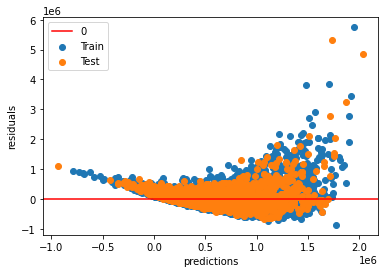

In [105]:
model_and_assess(list_KS,df_logged_KS)

## Final Model

Train R2: 0.7664147237748036
Test R2: 0.7609832645398629
----
Train RMSE: 0.2555751085275162
Test RMSE: 0.2537797777071668
----
Train MAE: 0.1970413920752013
Test MAE: 0.19624755020046575
        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     4425.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:38:44   Log-Likelihood:                -885.91
No. Observations:               16196   AIC:                             1798.
Df Residuals:                   16183   BIC:                             1898.
Df Model:                          12                                         
Covariance Type:            nonrobust             

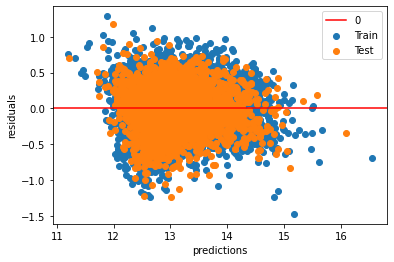

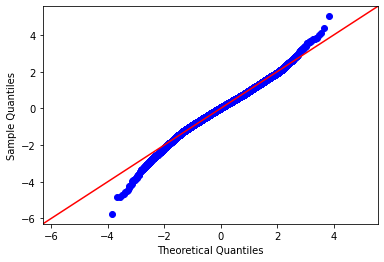

In [138]:
model_and_assess_log(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'haver_dist_miles'], df_log_train)

##### Final Model Interpretation

- Our final model has a R2 score of .76
- Model is homoskedastic
- Suffers from multicollinearity
- Errors are normally distributed
- Residuals show that the errors are not correlated
- The model is linear 

This model meets 4 out of the 5 assumptions of linearity.

#### Interpreting the coefficients

Here we want to get meaningful unscaled coefficients so that we can determine how much each feature effects price.

In [88]:
# we break down our function to just extract the coeffeicients and the features that they are associated with
formula_final = 'price ~ ' + ' + '.join(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'haver_dist_miles'])
model_final = ols(formula_final, df_log_train).fit()
model_final.params


Intercept           1.757498e+01
bedrooms           -2.662560e-02
bathrooms           6.777321e-02
sqft_living         1.532388e-04
sqft_lot            5.439834e-07
floors              7.550099e-02
view                7.308307e-02
condition           5.261924e-02
grade               1.524013e-01
yr_built           -3.167587e-03
sqft_living15       7.743918e-05
sqft_lot15          4.527774e-07
haver_dist_miles   -3.468523e-02
dtype: float64

In [89]:
# make a list of all the features
features = list(model_final.params.index)
# make a list of all the coefficients
coefs = list(model_final.params)
# zip them together
dict_coef=dict(zip(features,coefs))
# remove the intercept item from the dictionary
del dict_coef['Intercept']

In [90]:
len(features)

13

In [97]:
# print out an interpretation for every coefficient
for key, value in dict_coef.items():
    print(f"Controlling for all other features, for every unit increase in {key},\
the price increase by {(np.exp(value)-1)*100 :5f} % on average")

Controlling for all other features, for every unit increase in bedrooms,the price increase by -2.627427 % on average
Controlling for all other features, for every unit increase in bathrooms,the price increase by 7.012259 % on average
Controlling for all other features, for every unit increase in sqft_living,the price increase by 0.015325 % on average
Controlling for all other features, for every unit increase in sqft_lot,the price increase by 0.000054 % on average
Controlling for all other features, for every unit increase in floors,the price increase by 7.842430 % on average
Controlling for all other features, for every unit increase in view,the price increase by 7.581990 % on average
Controlling for all other features, for every unit increase in condition,the price increase by 5.402824 % on average
Controlling for all other features, for every unit increase in grade,the price increase by 16.462746 % on average
Controlling for all other features, for every unit increase in yr_built,th

### Interpret the RMSE and MAE

In [145]:
# unlogging the RMSE and MAE for interpretation
y_tr_unlog = y_train
tr_pred_unlog = np.exp(model_final.predict(X_train))
y_te_unlog = y_test
te_pred_unlog = np.exp(model_final.predict(X_test))


print('Training data:')
print(f"RMSE: {mean_squared_error(y_tr_unlog, tr_pred_unlog, squared=False):.4f}")
print(f"MAE: {mean_absolute_error(y_tr_unlog, tr_pred_unlog):.4f}")

print('Testing data:')
print(f"RMSE: {mean_squared_error(y_te_unlog, te_pred_unlog, squared=False):.4f}")
print(f"MAE: {mean_absolute_error(y_te_unlog, te_pred_unlog):.4f}")

Training data:
RMSE: 189377.6324
MAE: 108729.5850
Testing data:
RMSE: 167670.2236
MAE: 104053.8679


### Regression Results
- Controlling for all other features, for every mile away from Bellevue that a house is the price decreases by 3.4% on average.
- Keeping our other features constant, for every increase of 100 square feet of living area, the price increases by 1.5%.
- Accounting for all other features, a one unit increase in grade results in a price increase of 16.462746%.
- On average, our model is off by 189 thousand dollars for our training data and 168 thousand dollars for our testing data

## Conclusion